In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler


In [3]:
X_pca_input = pd.read_csv("X_pca_input.csv")
X_seq = pd.read_csv("X_seq.csv")
y = pd.read_csv("y.csv").values.ravel()

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca_input)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

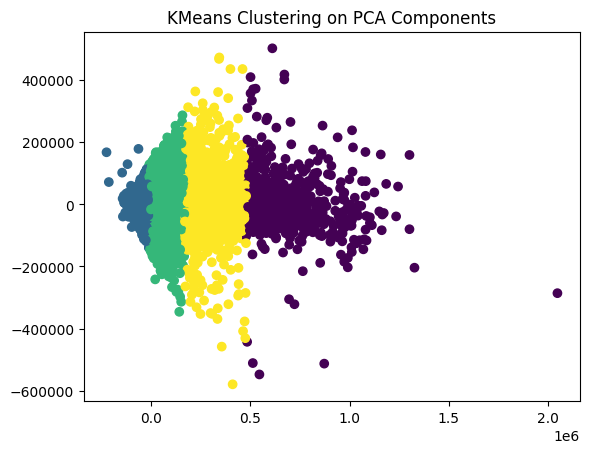

In [5]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("KMeans Clustering on PCA Components")
plt.show()

In [7]:
# lstm
scaler = StandardScaler()
X_seq_scaled = scaler.fit_transform(X_seq)
X_seq_reshaped = X_seq_scaled.reshape(-1, 6, 2)

In [8]:
# lstm Model
model = Sequential()
model.add(LSTM(64, input_shape=(6, 2), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_seq_reshaped, y, epochs=5, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7713 - loss: 0.5547 - val_accuracy: 0.7890 - val_loss: 0.5065
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7729 - loss: 0.5253 - val_accuracy: 0.7890 - val_loss: 0.5017
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7768 - loss: 0.5151 - val_accuracy: 0.7890 - val_loss: 0.5030
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7739 - loss: 0.5154 - val_accuracy: 0.7890 - val_loss: 0.4999
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7788 - loss: 0.5062 - val_accuracy: 0.7890 - val_loss: 0.4959
